# Multivariate: Vine Copulas

For a large selection of bivariate copula families, use pyvinecopulib's backend. This allows for several parametric and nonparametric families to be simulated. For a complete list please see https://vinecopulib.github.io/pyvinecopulib/_generate/pyvinecopulib.BicopFamily.html.

## Import libraries

In [1]:
import xarray as xr
import seaborn as sns
import pyvinecopulib as pv
import synthia as syn
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings('ignore')

## Create a sample dataset with n samples

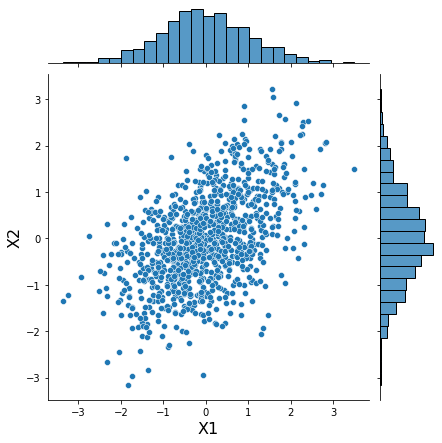

In [2]:
N_SAMPLES = 1000
mvnorm = multivariate_normal(mean=[0, 0], cov=[[1, 0.5],
                                               [0.5, 1]])
# Generate random samples from multivariate normal with correlation .5
data = xr.DataArray(mvnorm.rvs(N_SAMPLES))

h = sns.jointplot(data[:, 0], data[:, 1], kind='scatter')
h.set_axis_labels('X1', 'X2', fontsize=16);

## Fit a Vine copula with pyvinecopulib's backend

In this example we let pyvinecopulib choose the "best" type of copula for the type of data. In this case as we know the data was generated from a multivariate random, we could equally specify this by passing `family_set` to the `FitControlsVinecop` class (e.g. `pv.FitControlsVinecop(family_set=[pv.BicopFamily.gaussian])`).

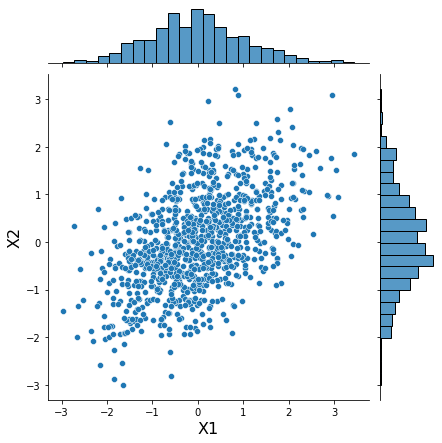

In [3]:
generator = syn.CopulaDataGenerator()

parameterizer = syn.QuantileParameterizer(n_quantiles=100)

ctrl = pv.FitControlsVinecop(family_set=[pv.BicopFamily.gaussian])
generator.fit(data, copula=syn.VineCopula(controls=ctrl), parameterize_by=parameterizer)

samples = generator.generate(n_samples=N_SAMPLES)

h = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter')
h.set_axis_labels('X1', 'X2', fontsize=16);